# **Análisis exploratorio y estadística**
# AE14 - Introducción a conceptos de correlación


En este notebook  utilizaremos principalmente le dataset del Titanic para  reforzar las visualizaciones desarrolladas en los notebook anteriores, e introducir el conceptos de correlación.


Como punto de partida importaremos nuestras 4 librerías.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## <font color='blue'>**Leyendo los datos**</font>

El código está adaptado para poder leer desde google drive, sin embargo, se puede modificar la ruta si es que se quiere trabajar en forma local.

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#path = '/content/drive/MyDrive/Cursos/Estadistica/EstadisticaDescriptiva/data/'
path = ''
trainFile = 'titanic_train.csv'

In [ ]:
train_df = pd.read_csv(path + trainFile)

## <font color='blue'>**Nuestra estadística descriptiva**</font>

La siguiente, es el diccionario de datos del archivo:

1. Survival: Sobreviviente		0 = No, 1 = Si
2. Pclass: La clase del ticket	1 = 1st, 2 = 2nd, 3 = 3rd
3. Sex:	Sexo
4. Age: Edad en años
5. Sibsp:	Número de hermanas / cónyuges a bordo del Titanic
6. Parch:	Número de padres / hijos a bordo del Titanic
7. Ticket:	Número del ticket
8. Fare:	Tarifa de pasajero
9. Cabin: Número de cabina
10. Embarked: Puerto de embarque	C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000,257.354,1.00,223.500,446.000,668.5,891.000
Survived,891.0,0.384,0.487,0.00,0.000,0.000,1.0,1.000
Pclass,891.0,2.309,0.836,1.00,2.000,3.000,3.0,3.000
Age,714.0,29.699,14.526,0.42,20.125,28.000,38.0,80.000
SibSp,891.0,0.523,1.103,0.00,0.000,0.000,1.0,8.000
Parch,891.0,0.382,0.806,0.00,0.000,0.000,0.0,6.000
Fare,891.0,32.204,49.693,0.00,7.910,14.454,31.0,512.329


Qué puede decir de los distintos atributos? Cómo es la media y la mediana? Existe mucha diferencia entre ellas en algunas variables, por ejemplo **Survived**? Qué significa eso?

Algunas características del dataset son:
* El 38.4% de las personas registradas en el dataset logró sobrevivir.
* Más del 50% del dataset viaja en clase 3.
* El registro de edad es incompleto (tiene 714 datos no nulos de un total de 891 registros). La mediana es de 28 años, y el promedio es de 29.7. El máximo es de 80 años.
* Existe una alta dispersión en el precio de los pasajes, lo que indicaría una gran diferencia entre la calidad de los alojamientos de tercera versus primera clase.
* Los valores de SibSp y Parch tienen una gran asimetría entorno a cero, lo que indicaría que la mayoría de los pasajeros no viaja con familiares directo.


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## <font color='blue'>**Análisis categórico**</font>

Analicemos la variable __Survival__.

In [ ]:
c_palette = ['tab:blue', 'tab:orange']

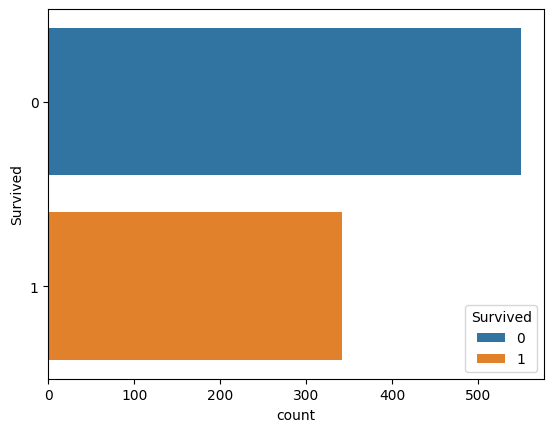

In [ ]:
sns.countplot(y='Survived', hue='Survived', data=train_df, palette=c_palette)
plt.show()

Analicemos la variable __Sex__, pero agregando la codición de si sobrevició o no. Sobrevivientes por sexo:

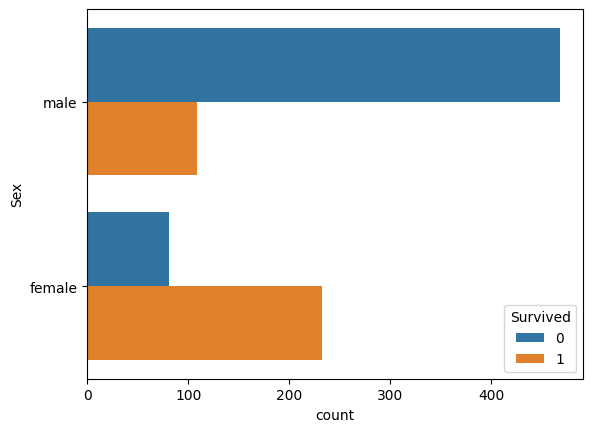

In [ ]:
sns.countplot(y='Sex', hue='Survived', data=train_df, palette=c_palette)
plt.show()

En proporción sobrevivieron más mujeres que hombres. Sin embargo, es interesante explorar si esto se mantuvo bajo otras condiciones como por ejemplo donde embarcó o la clase en la que viajaba el pasajero.

### <font color='green'>**Actividad 1**</font>

Realice el mismo ejercicio anterior pero considere la variable **Embarked** y **Pclass**, siga diferenciando la visualización por la variable __Survived__.

Qué conclusión puede generar?

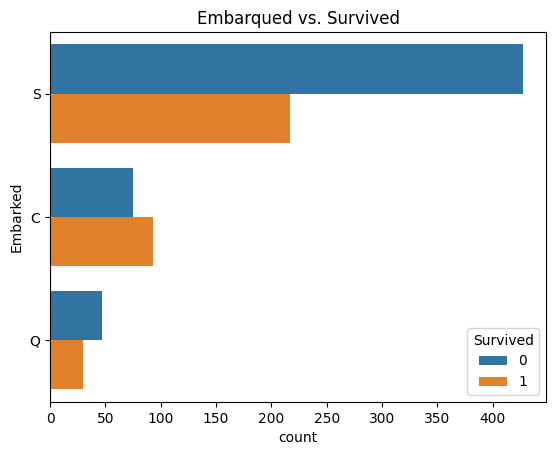

In [ ]:
# Tu código aquí ...

# Variable Embarqued
sns.countplot(y='Embarked', hue='Survived', data=train_df, palette=c_palette)
plt.title('Embarqued vs. Survived')
plt.show()

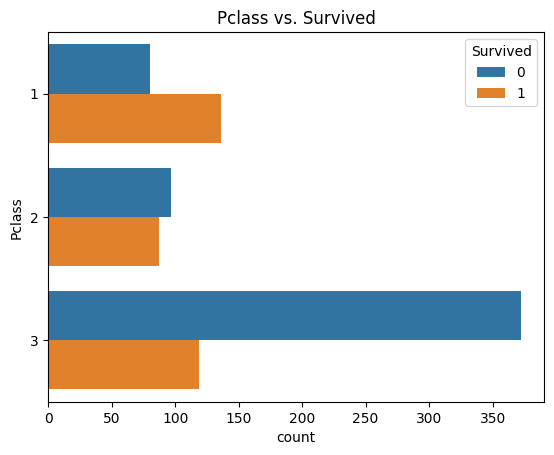

In [ ]:
# Variable Pclass
sns.countplot(y='Pclass', hue='Survived', data=train_df, palette=c_palette)
plt.title('Pclass vs. Survived')
plt.show()


De las gráficas dibujadas se puede observar que:
* En el puerto de Southampton se embarcó la mayor cantidad de pasajeros del dataset, y la proporción de sobrevivientes es aproximadamente de un tercio del total.
* De las personas que embarcaron en Cherbourg, lograron sobrevivir más de la mitad, diferenciándose de la tenedencia general del accidente.
* En cuanto a las personas embarcadas en Queenstown, la proporción de sobrevivientes es algo mayor que la general, pero inferior al 50%.
* La proporción de sobrevivientes es mayor en las clases 1 y 2. En la clase 1 supera el 50%, lo que indica que tuvieron un mejor acceso a recursos de supervivencia.
* En la clase 3, el nivel de supervivencia es aproximadamente un 25% del total de la clase, distante del 38.4% general del dataset.

<font color='green'>Fin Actividad 1</font>

## <font color='blue'>**Análisis cuantitativo**</font>

Analicemos la variable __Age__.

In [ ]:
c_palette = ['tab:blue', 'tab:orange']
c_palette3 = ['tab:blue', 'tab:orange','tab:green']

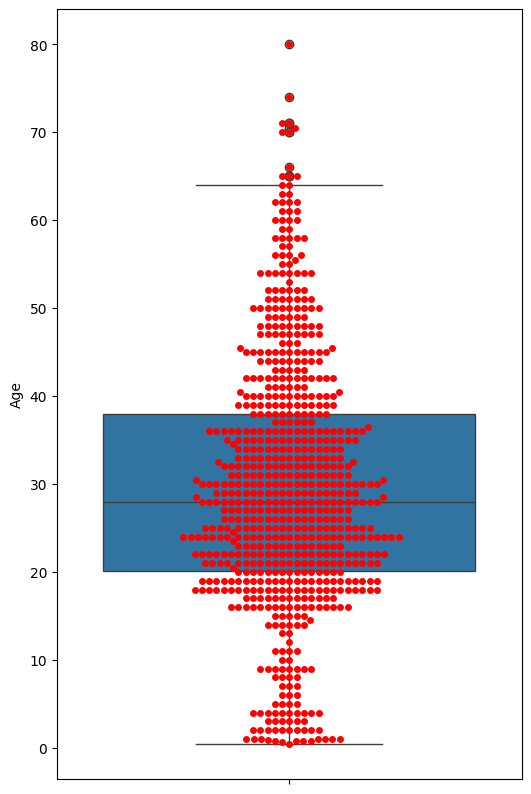

In [ ]:
# Analisis univariado.
plt.figure(figsize=(6,10)) # Agrandamos la figura para hacerla más clara
sns.boxplot(y='Age', data=train_df)
sns.swarmplot(y='Age', data=train_df, color='r')
plt.show()

<ipython-input-18-ef682d977ca4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=train_df, palette=c_palette) # probar con boxprops=dict(alpha=.5)


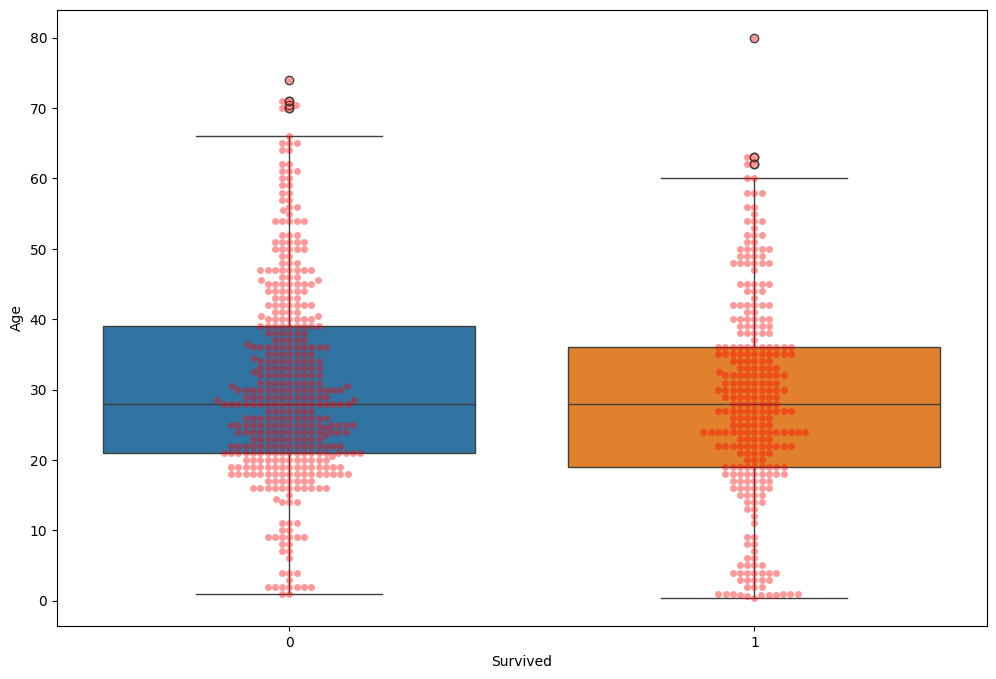

In [ ]:
# Exploremos la edad pero considerando adicionalmente Survived
plt.figure(figsize=(12, 8)) # Agrandamos la figura para hacerla más clara
sns.boxplot(x='Survived', y='Age', data=train_df, palette=c_palette) # probar con boxprops=dict(alpha=.5)
sns.swarmplot(x='Survived', y='Age', data=train_df, color='r', alpha=0.4)
plt.show()

Visualmente no se observa que existió una diferencia marcada por la edad entre los sobrevivientes y los que no.

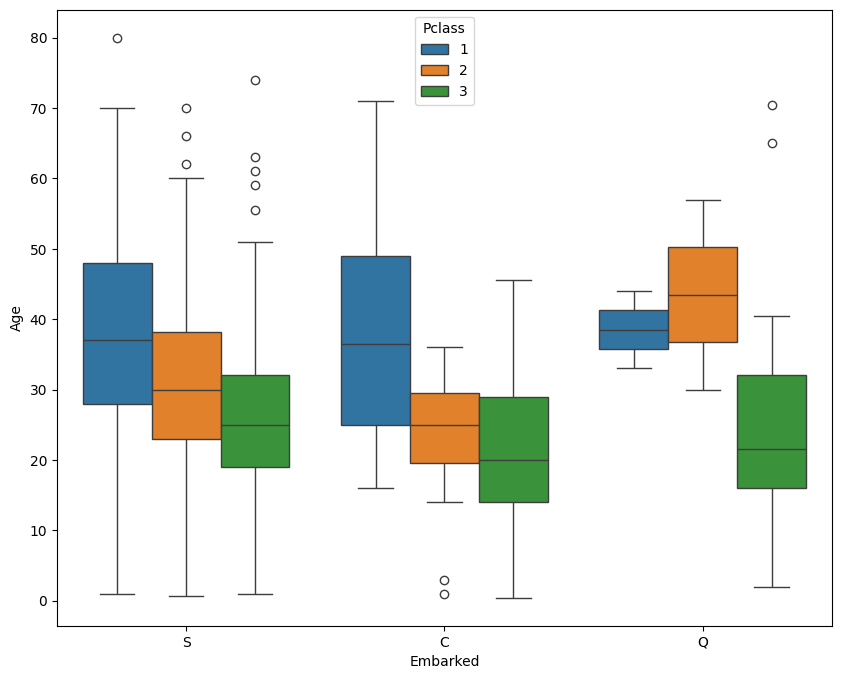

In [ ]:
# Incoproremos la clase y el embarque para ver si existe relación entre la edad y estas variables.
plt.figure(figsize=(10, 8))
sns.boxplot(x='Embarked', y='Age', hue='Pclass',
            data=train_df, palette=c_palette3)
plt.show()

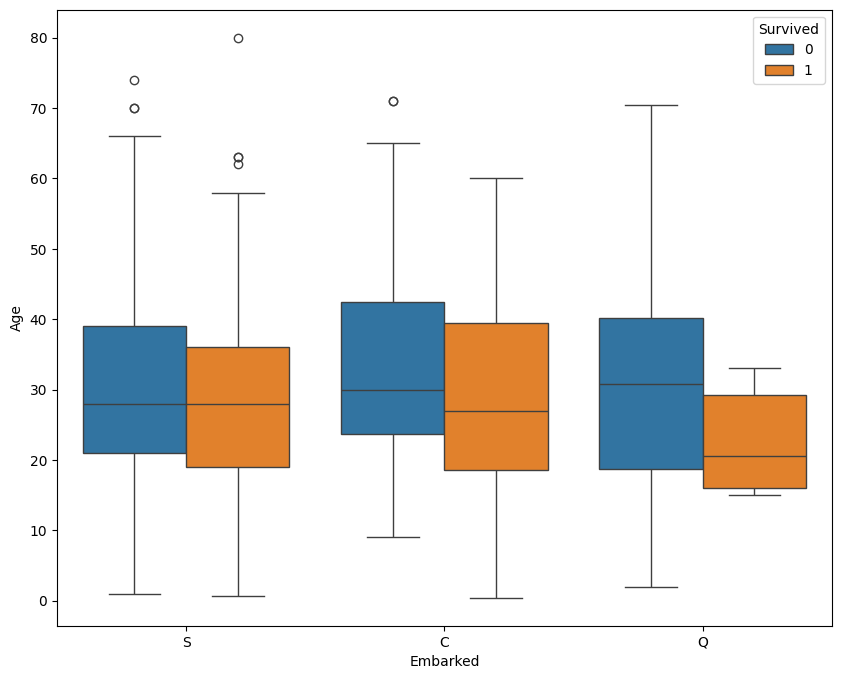

In [ ]:
# Analicemos la relación entre Embarked, Age y Survived.

plt.figure(figsize=(10, 8))
sns.boxplot(x='Embarked', y='Age', hue='Survived',
            data=train_df, palette=c_palette)
plt.show()

### <font color='green'>**Actividad 2**</font>

1. Compare a través de un `boxplot` cómo es la dependencia entre la variable __Parch__, que representa el número de padres o hijos que viajaban, respecto de si sobrevivió o no.
2. Realice el mismo análisis para __SibSp__.

Incorpore también un _swarmplot_ para entender la cantidad de puntos relacionados.

Qué conclusión puede generar?

<ipython-input-37-d725eed3c150>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Parch', x= 'Survived', data=train_df, palette=c_palette) # probar con boxprops=dict(alpha=.5)
<ipython-input-37-d725eed3c150>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Parch', x= 'Survived', data=train_df, palette=c_palette) # probar con boxprops=dict(alpha=.5)


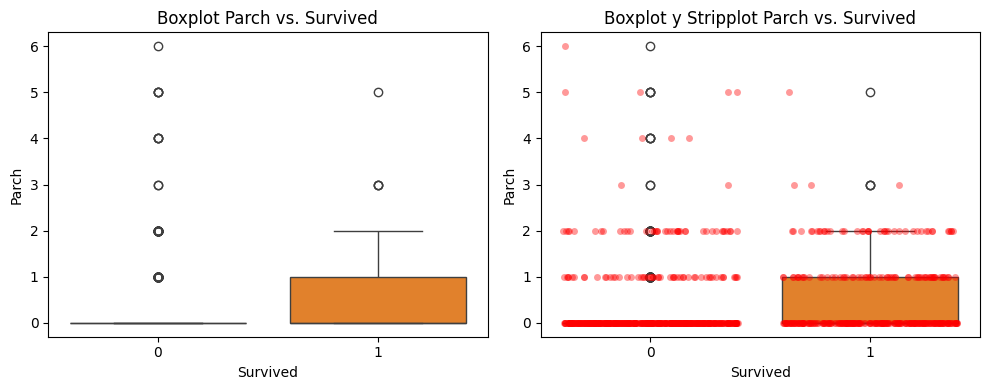

In [ ]:
# Tu código aquí ...
# Pregunta 1. # Parent Child (Parch)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.boxplot(y='Parch', x= 'Survived', data=train_df, palette=c_palette) # probar con boxprops=dict(alpha=.5)
plt.title('Boxplot Parch vs. Survived')

plt.subplot(1, 2, 2)
sns.boxplot(y='Parch', x= 'Survived', data=train_df, palette=c_palette) # probar con boxprops=dict(alpha=.5)
sns.stripplot(y='Parch', x= 'Survived', data=train_df, color='r', alpha=0.4, jitter=0.4)
plt.title('Boxplot y Stripplot Parch vs. Survived')


plt.tight_layout()
plt.show()

<ipython-input-35-8d65b9e4ca7f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='SibSp', x= 'Survived', data=train_df, palette=c_palette) # probar con boxprops=dict(alpha=.5)
<ipython-input-35-8d65b9e4ca7f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='SibSp', x= 'Survived', data=train_df, palette=c_palette) # probar con boxprops=dict(alpha=.5)


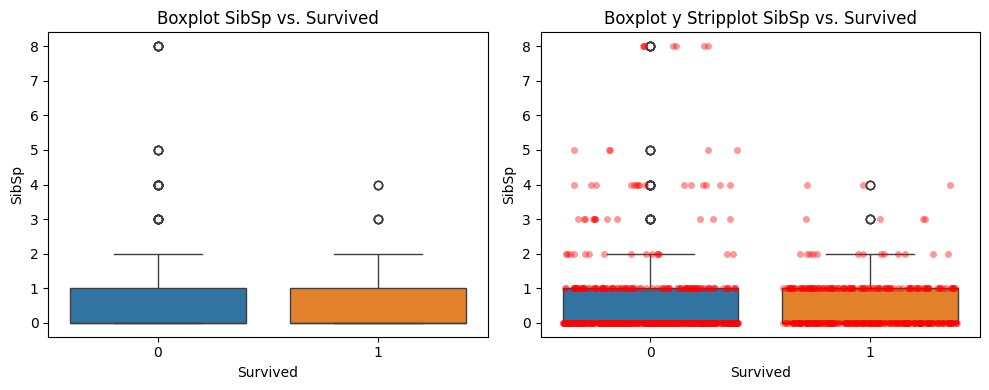

In [ ]:
# Pregunta 2. Siblings Spouse (SibSp)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.boxplot(y='SibSp', x= 'Survived', data=train_df, palette=c_palette) # probar con boxprops=dict(alpha=.5)
plt.title('Boxplot SibSp vs. Survived')

plt.subplot(1, 2, 2)
sns.boxplot(y='SibSp', x= 'Survived', data=train_df, palette=c_palette) # probar con boxprops=dict(alpha=.5)
sns.stripplot(y='SibSp', x= 'Survived', data=train_df, color='r', alpha=0.4, jitter=0.4)
plt.title('Boxplot y Stripplot SibSp vs. Survived')


plt.tight_layout()
plt.show()


A partir de los graficos, se puede observar:
* Debido a que la gráfica de `swarmplot` entregaba muchas advertencias por la superposición del los puntos, se cambió el tipo de gráfica a `stripplot`, que entrega un mejor resultado visual.
* Respecto al gráfico de la variable **Parch**, observamos que la mayoría de los pasajeros, tanto entre los sobrevivientes como los no sobrevivientes, no tenían padres o hijos a bordo.
* Existe una ligera mayor presencia de pasajeros con 1-2 padre/hijos en los sobrevivientes, a diferencia de lo observado en quienes no sobrevivieron.
* Respecto al gráfico de la variable **SibSp**, se observa que la mayoría de los pasajeros no tiene hermanos o conyuges a bordo, tanto entre los sobrevivientes como los no sobrevivientes.
* En general, las gráficas podrían indicar que la existencia de algún vinculo familiar tiene un pequeño efecto positivo en la supervivencia. Sin embargo, la gran mayoría de los pasajeros no tenía familiares a bordo, por lo que se vuelven más relevantes otrs factores como la clase, o el género para el acceso a botes salvavidas.

<font color='green'>Fin Actividad 2</font>


## <font color='purple'> __EXPERIMENTO__: </font>
### Creación de una grilla de gráficos para comparación rápida

Para el caso de la Actividad 2, nos interesa crear una vista donde se pueda visualizar la Supervivencia en función del Puerto de Embarque, la Clase, y el Género de los pasajeros.

Para ello se investigó el uso de los parámetros `col` y `row` de la función de gráfico `catplot`, lo que nos permitirá crear una **grilla de gráficas** para visualizar las distintas combinaciones: **Supervivencia (2) x Embarque (3) x Clase (3) y Género (2)**.

De este modo se creará una grilla de 3 x 3 gráficas que muestre:
* Cada Fila corresponde a un Puerto de Embarque (`Embarked`).
* Cada Columna corresponde a una Clase (`Pclass`).
* En cada gráfica se visualiza la cantidad de pasajeros que sobrevive o no (`Survived`), clasificada según su género (`Sex`).

<Figure size 600x400 with 0 Axes>

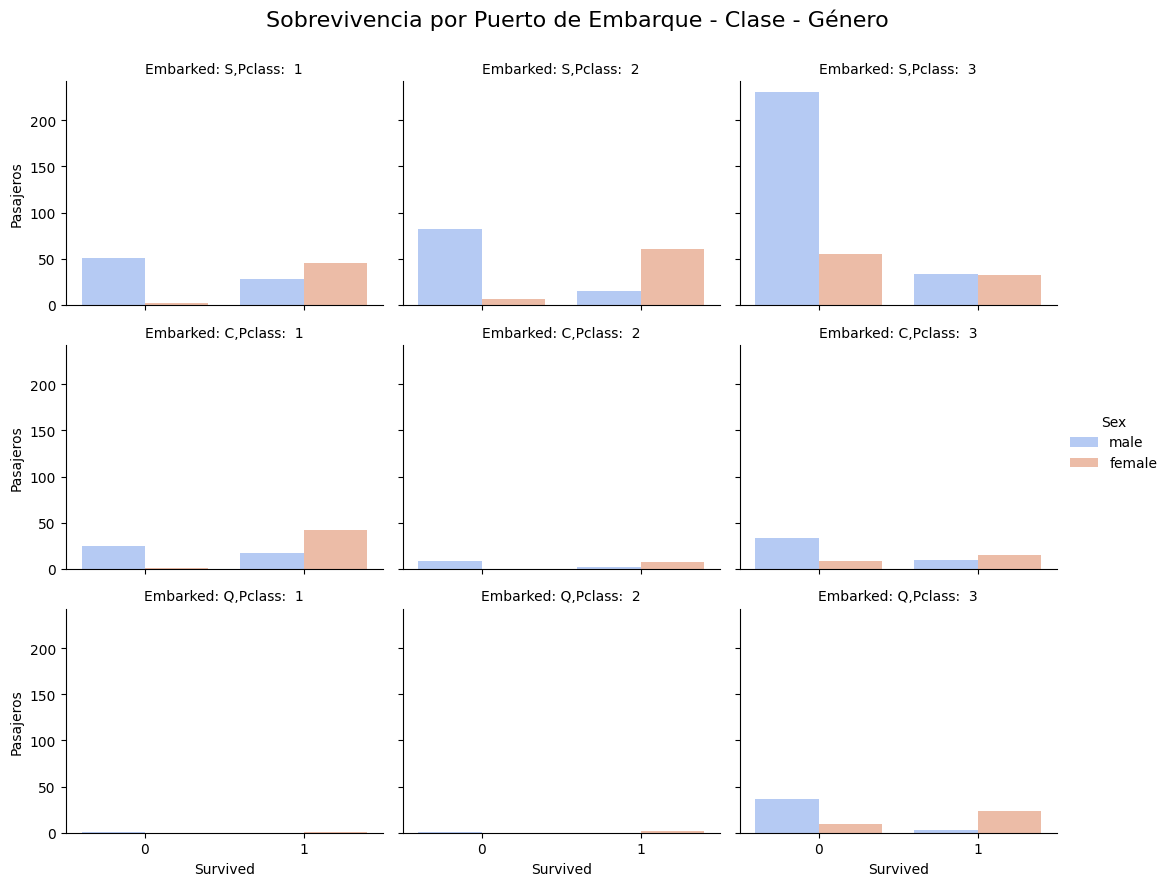

In [ ]:
# Grafica combinada
plt.figure(figsize=(6, 4))
g = sns.catplot(x="Survived", hue="Sex", col="Pclass", row="Embarked", data=train_df,
                kind="count", height=3, aspect=1.2, palette="coolwarm", legend_out=True)
g.set_axis_labels("Survived", "Pasajeros")
g.set_titles("Embarked: {row_name},Pclass:  {col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Sobrevivencia por Puerto de Embarque - Clase - Género', fontsize=16)

plt.show()

Se observa que esta representación tiene ventajas para obtener información visual, por ejemplo:
* Recorrer las gráficas de una fila para ver el comportamiento de los pasajeros embarcados en un mismo puerto, agrupados por clase y género .
* Recorrer las gráficas por columnas para ver el comportamiento de los pasajeros de una misma clase, agrupados por puerto de embarque y género.
* Por ejemplo, se aprecia que la cantidad de mujeres de las clases 1 y 2 que no sobrevive es mínima, independientemente de su puerto de embarque. O que sólo entre las embarcadas en Southampton de la clase 3, la proporción de mujeres que sobrevive es menor al 50%.

### <font color='purple'>Fin experimento </font>

## <font color='blue'>**Análisis de correlación**</font>

###__¿Qué es la correlación?__<br>
La correlación es una medida estadística que expresa hasta qué punto dos variables están relacionadas linealmente (esto es, cambian conjuntamente a una tasa constante). Es una herramienta común para describir relaciones simples sin hacer afirmaciones sobre causa y efecto.

### __¿Cómo se mide la correlación?__<br>
Describimos la correlación mediante una __medida sin unidades__ llamada __coeficiente de correlación__, que va desde -1 a +1 y se indica mediante las letras $r$ o $\rho$ (para muestras o poblaciones respectivamente); este coeficiente cuantifica la intensidad de la relación. La significancia estadística se indica mediante un valor p. Por tanto, usualmente las correlaciones se escriben con dos números clave: $r$ y $p$.
Existen varios estadísticos desarrollados con el objetivo de medir este tipo de asociación, algunos de los más empleados son __Pearson__, __Spearman__ y __Kendall__.

* Cuanto más se aproxima $r$ a cero, más débil es la relación lineal.
* Los valores de $r$ positivos indican una correlación positiva, en la que los valores de ambas variables tienden a incrementarse juntos.
* Los valores de $r$ negativos indican una correlación negativa, en la que los valores de una variable tienden a incrementarse mientras que los valores de la otra variable descienden.
El valor $p$ aporta evidencia de que podemos concluir de manera significativa que es probable que el coeficiente de correlación de la población sea diferente a cero, basándonos en lo que hemos observado en la muestra.
* El que sea una "medida sin unidades" significa que la correlación tiene su propia escala: en nuestro ejemplo, el número de $r$ no está en la misma escala que la altura ni que la temperatura. Esto es diferente a otros estadísticos de resumen. Por ejemplo, la media de las medidas de altura está en la misma escala que su variable.

__¿Cuáles son algunas limitaciones del análisis de correlación?__<br>
La correlación no puede medir la presencia o el efecto de otras variables aparte de las dos que se están explorando. Es importante saber que la correlación no nos informa sobre causas y efectos. Además, la correlación no puede describir con precisión las relaciones curvilíneas.

### __Covarianza__
Para estudiar la relación lineal existente entre dos variables continuas es necesario disponer de parámetros que permitan cuantificar dicha relación. Uno de estos parámetros es la __covarianza__, que mide el grado de variación conjunta de dos variables aleatorias.

<br><br>
$$
\text{Covarianza}\: \text{muestral} = Cov(X,Y) = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i - \bar{y})} {N-1}$$
<br>
donde  $\bar{x}$  e  $\bar{y}$  son la media de cada variable, y $x_i$  e $y_i$  son los valores de las variables para la observación $i$ .


<br>
En la siguiente imagen vemos varios grupos de puntos $(x,y)$, con el coeficiente de correlación para cada grupo. Nótese que la correlación refleja la no linealidad y la dirección de la relación lineal. En la figura del centro, la varianza de $y$ es nula, por lo que la correlación es indeterminada.

<img src="https://drive.google.com/uc?export=view&id=1THxrficSNSUI3xx5U7nNdtKVZZv0zZBC" width='600'><br>
Image: Denis Boigelot

Valores positivos indican que las dos variables cambian en la misma dirección y, valores negativos, que lo hacen en direcciones opuestas.

La principal limitación de la covarianza es que, su magnitud, depende de las escalas en que se miden las variables estudiadas. Esto implica que no puede utilizarse para comparar el grado de asociación entre pares de variables medidas en distintas escalas. Una forma de evitar esta limitación, y poder hacer comparaciones, consiste en estandarizar la covarianza, generando lo que se conoce como coeficientes de correlación.


### __Significancia estadística__

Además del valor obtenido para el coeficiente de correlación, es necesario calcular su significancia estadística. Por muy cercano que sea el valor del coeficiente de correlación a  +1  o  −1 , si no es significativo, no se dispone de evidencias suficiente para afirmar que existe una correlación real, ya que el valor observado podría deberse a simple aleatoriedad.

El test paramétrico de significancia estadística empleado para el coeficiente de correlación es el t-test. Donde el estadístico t se obtiene acorde a la ecuación:
$$
t = \frac{r \sqrt{N - 2}} {\sqrt{1 - r^2}}
$$

donde, $r$ es el valor del coeficiente de correlación y $N = n_x + n_y$ es el número de observaciones disponibles de ambas variables. Los grados de libertad se calculan como  $df=N-2$ (un grado de libertad menos por cada variable).

En este test, se considera como hipótesis nula ($H_0$ ) que las variables son independientes (coeficiente de correlación poblacional = 0), y como hipótesis alternativa ($H_1$), que sí existe relación (coeficiente de correlación poblacional $\ne$ 0).

### __Tamaño de efecto__

La correlación lineal, además del valor del coeficiente de correlación y de sus significancia, también tiene un tamaño de efecto asociado conocido como coeficiente de determinación $R^2$.

$R^2$  se interpreta como la cantidad de varianza de $Y$  explicada por $X$. En el caso del coeficiente de Pearson y el de Spearman, $R^2$  se obtiene elevando al cuadrado el coeficiente de correlación. En el caso de Kendall no se puede calcular de este modo.


### **Correlacion de Pearson**
La correlación de Pearson mide la relación lineal entre dos variables en base a la covarianza estandarizada. La definicion forma es:

$$ \rho_{X,Y} = \frac{cov(X,Y)}{\sigma_X \sigma_Y}$$


La anterior ecuación se corresponde con el coeficiente de Pearson poblacional ($\rho$ ). En la práctica, raramente se tiene acceso a toda la población, por lo que su valor se estima a partir de una muestra mediante el coeficiente de Pearson muestral ($r$): <br><br>

$$
r_{x,y} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})} {\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2 \sum_{i=1}^{n}(y_i - \bar{y})^2}}
$$

__Condiciones__

Las condiciones que se deben de cumplir para que el coeficiente de correlación de Pearson sea válido son:

* La relación que se quiere estudiar es de tipo lineal (de lo contrario, el coeficiente de Pearson no la puede detectar).

* Las dos variables deben de ser numéricas.

* Normalidad: ambas variables se tienen que distribuir de forma normal. En la práctica, se suele considerar válido aun cuando se alejan moderadamente de la normalidad.

* Homocedasticidad: la varianza de  $Y$ debe ser constante a lo largo de la variable  $X$. Esto se puede contrastar si en un scatterplot los valores de  $Y$  mantienen la misma dispersión en las distintas zonas de la variable  $X$ .

Veamos la correlación de las variables en el caso del dataset del Titanic.

In [ ]:
# Eliminamos las variables categoricas
corr_df = train_df.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis = 1)
corr_df['Age']

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [ ]:
# Hay NaN, los rellenamos con la moda
corr_df['Age'] = corr_df['Age'].fillna(value=corr_df['Age'].mode()[0])
corr_df['Age']

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,24.0
889,26.0


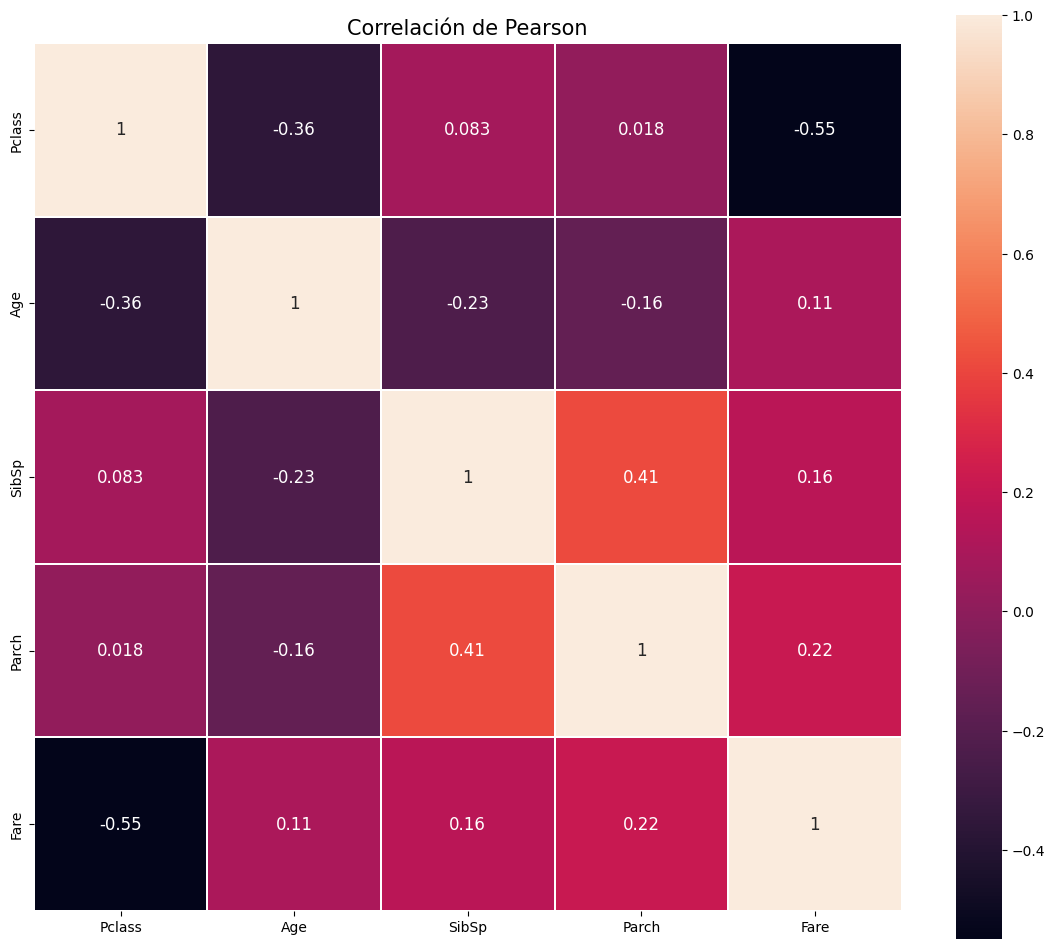

In [ ]:
plt.figure(figsize=(14,12))
plt.title('Correlación de Pearson', size = 15)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(corr_df.corr(),
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':12 })
plt.show()

Considere la siguiente escala:

|Valor|Fuerza de la asociación|
|:---:|:----------------------|
|0    |Asociación nula        |
|0.1  |Asociación pequeña     |
|0.3  |Asociación mediana     |
|0.5  |Asociación moderada    |
|0.7  |Asociación alta        |
|0.9  |Asociación muy alta    |

Qué relación interesante aparece?<br>
Qué tipo relación hay entre las variables?<br>
Cuál de ellas tienen las correlaciones positivas o negativas más altas?

De los valores de la matriz de correlación, se observa que:
* SibSP y Parch correlacionan moderadamente, estando ambas relacionadas a vínculo familiar.
* Clase y valor del boleto correlacionan moderada y negativamente, dado que a menor etiqueta de clase (1) el ticket es más caro, y viceversa.
* La edad y la clase correlacionan con un intensidad mediana y negativa, sugiriendo que a menor etiqueta de clase (1) la edad tiende a ser mayor.


## <font color='purple'>__MATERIAL ADICIONAL__</font>
En este link se desarrolla una guía paso a paso para calcular correlaciones de Pearson, la correlación de Spearman y la correlación de Kendall usando Python, desde la preparación de datos hasta la interpretación de resultados.

### Link: [Cómo Calcular Correlaciones en Python: Guía Completa en 7 Pasos [Pearson, Kendall, Spearman]](https://youtu.be/9NllQezOqPs)


### <font color='purple'>Fin material adicional </font>